In [1]:
import os, time, math
import math
from math import sqrt
#from ann_visualizer.visualize import ann_viz
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.models import Model
#from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
#from tune_sklearn import TuneGridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
reg_decision_model=DecisionTreeRegressor()
from sklearn.model_selection import StratifiedKFold
from hyperopt import tpe,hp,Trials
import xgboost as xgb
from hyperopt.fmin import fmin
import geopandas as gpd

C:\Users\mmmiah\AppData\Local\ESRI\conda\envs\geo_env\Lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_3156\1690410514.py:56: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (http

In [2]:
#!pip install hyperopt

In [3]:
# import necessary library
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import networkx as nx
import osmnx as ox
import os 
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import shapely.geometry as geom
import shapely.wkt

In [4]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [26]:
# read data
data=pd.read_csv("D:/Bike Exposure/Modeling/Model_clean_data_july23_AADBT.csv")
data['bike_fac']=data['path']+data['bike_lane']+data['bike_route']+data['cycle_track']+data['trail']
data.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_3156\723155806.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("D:/Bike Exposure/Modeling/Model_clean_data_july23_AADBT.csv")


,Unnamed: 0,county,X,ID,location,Lat,Long,year,ATT,no_of_months_data_collected,...,totatleastbachelorspersqmi_h,pctnoveh_h,totnovehpersqmi_h,popdensitysqmi_h,hshlddensitysqmi_h,medhhincome_h,Mean,std,outlier,bike_fac
0,1,Alameda,122,8578,urban,37.849934,-122.288850,2018,11376,1,...,4297.650441,0.129288,528.406127,8836.298555,4087.036520,96990.667535,148.898849,158.580163,False,0
1,2,Alameda,285,21805,urban,37.814124,-122.255859,2019,12785,7,...,13075.566793,0.188265,2395.066909,23080.419282,12721.814900,88387.488296,148.898849,158.580163,False,0
2,3,Alameda,286,21806,urban,37.814124,-122.255859,2019,24424,7,...,13075.566793,0.188265,2395.066909,23080.419282,12721.814900,88387.488296,148.898849,158.580163,False,0
3,4,Alameda,128,14389,urban,37.533787,-122.079500,2017,69539,12,...,40.415274,0.013903,0.350566,85.638312,25.215725,198237.000000,148.898849,158.580163,False,0
4,5,Alameda,129,14389,urban,37.533787,-122.079500,2018,77973,12,...,40.415274,0.013903,0.350566,85.638312,25.215725,198237.000000,148.898849,158.580163,False,0


In [9]:
# lv=data.loc[data["ATT"]<=2000]
# lv['type']

In [10]:
data['AADB'].describe()

count    4220.000000
mean      168.197867
std       268.195932
min         1.000000
25%        38.000000
50%        82.000000
75%       181.000000
max      3243.000000
Name: AADB, dtype: float64

In [40]:
per=data.loc[data['type']=='eco_permanent']
per_uni=per.drop_duplicates(subset=['ID'], keep='first')
short=data.loc[data['type']=='short_term']
short_uni=short.drop_duplicates(subset=['tdg_id'], keep='first')

In [41]:
per.shape, short.shape,short_uni.shape

((660, 193), (3560, 193), (2589, 193))

In [35]:
# Descriptive statistics by facilities
print('unique_permanent counter:',per_uni.groupby(['path'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['bike_lane'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['bike_route'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['cycle_track'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['trail'])['AADB'].count())
both=per_uni.loc[per_uni['bike_fac']==0]
print('unique_permanent counter on other facilitie:',both.shape)

# total gross counter
print('total_permanent counter:',per.groupby(['path'])['AADB'].count())
print('total_permanent counter:',per.groupby(['bike_lane'])['AADB'].count())
print('total_permanent counter:',per.groupby(['bike_route'])['AADB'].count())
print('total_permanent counter:',per.groupby(['cycle_track'])['AADB'].count())
print('total_permanent counter:',per.groupby(['trail'])['AADB'].count())
tboth=per.loc[per['bike_fac']==0]
print('total_permanent counter on other facilities:',tboth.shape)


# total gross counter
print('total_permanent counter:',per.groupby(['path'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['bike_lane'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['bike_route'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['cycle_track'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['trail'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['trail'])['AADB'].describe())
print('total_permanent counter:',tboth['AADB'].describe())

unique_permanent counter: path
0    148
1     55
Name: AADB, dtype: int64
unique_permanent counter: bike_lane
0    136
1     67
Name: AADB, dtype: int64
unique_permanent counter: bike_route
0    161
1     42
Name: AADB, dtype: int64
unique_permanent counter: cycle_track
0    203
Name: AADB, dtype: int64
unique_permanent counter: trail
0    202
1      1
Name: AADB, dtype: int64
unique_permanent counter on other facilitie: (38, 193)
total_permanent counter: path
0    494
1    166
Name: AADB, dtype: int64
total_permanent counter: bike_lane
0    436
1    224
Name: AADB, dtype: int64
total_permanent counter: bike_route
0    505
1    155
Name: AADB, dtype: int64
total_permanent counter: cycle_track
0    660
Name: AADB, dtype: int64
total_permanent counter: trail
0    658
1      2
Name: AADB, dtype: int64
total_permanent counter on other facilities: (113, 193)
total_permanent counter:       count        mean         std  min    25%    50%     75%     max
path                                  

In [44]:
# Descriptive statistics by facilities
print('unique_short counter:',short_uni.groupby(['path'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['bike_lane'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['bike_route'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['cycle_track'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['trail'])['AADB'].count())
both=short_uni.loc[short_uni['bike_fac']==0]
print('unique_pshort counter on other facilitie:',both.shape)

# total gross counter
print('total_short counter:',short.groupby(['path'])['AADB'].count())
print('total_short counter:',short.groupby(['bike_lane'])['AADB'].count())
print('total_short counter:',short.groupby(['bike_route'])['AADB'].count())
print('total_short counter:',short.groupby(['cycle_track'])['AADB'].count())
print('total_short counter:',short.groupby(['trail'])['AADB'].count())
tboth=short.loc[short['bike_fac']==0]
print('total_short counter on other facilities:',tboth.shape)


# total gross counter
print('total_short counter:',short.groupby(['path'])['AADB'].describe())
print('total_short counter:',short.groupby(['bike_lane'])['AADB'].describe())
print('total_short counter:',short.groupby(['bike_route'])['AADB'].describe())
print('total_short counter:',short.groupby(['cycle_track'])['AADB'].describe())
print('total_short counter:',short.groupby(['trail'])['AADB'].describe())
print('total_short counter:',tboth['AADB'].describe())

unique_short counter: path
0    2545
1      44
Name: AADB, dtype: int64
unique_short counter: bike_lane
0    2226
1     363
Name: AADB, dtype: int64
unique_short counter: bike_route
0    2395
1     194
Name: AADB, dtype: int64
unique_short counter: cycle_track
0    2584
1       5
Name: AADB, dtype: int64
unique_short counter: trail
0    2587
1       2
Name: AADB, dtype: int64
unique_pshort counter on other facilitie: (1981, 193)
total_short counter: path
0    3496
1      64
Name: AADB, dtype: int64
total_short counter: bike_lane
0    3026
1     534
Name: AADB, dtype: int64
total_short counter: bike_route
0    3215
1     345
Name: AADB, dtype: int64
total_short counter: cycle_track
0    3555
1       5
Name: AADB, dtype: int64
total_short counter: trail
0    3558
1       2
Name: AADB, dtype: int64
total_short counter on other facilities: (2610, 193)
total_short counter:        count        mean         std   min   25%   50%    75%     max
path                                             

In [9]:
pd.options.display.float_format = '{:.2f}'.format
per['AADB'].describe()

count    660.00
mean     352.28
std      513.93
min        1.00
25%       54.00
50%      139.00
75%      415.50
max     3243.00
Name: AADB, dtype: float64

In [10]:
short['AADB'].describe()

count   3560.00
mean     134.07
std      170.04
min        3.00
25%       37.00
50%       75.00
75%      160.00
max     1967.00
Name: AADB, dtype: float64

In [11]:
short.groupby(['Leg','year'])['AADB'].describe()

count   mean    std   min   25%    50%    75%     max
Leg year                                                       
E   2014  64.00 145.09 155.38 16.00 36.75  73.50 190.75  663.00
    2015  83.00 151.94 153.41 10.00 52.00  96.00 201.50  772.00
    2016 318.00 180.53 273.94 10.00 47.25  85.50 194.25 1967.00
    2017 101.00 112.32  98.15  7.00 45.00  81.00 147.00  473.00
    2018 246.00 123.61 133.51  5.00 37.00  76.00 158.25  738.00
    2019  74.00  68.12  74.16 11.00 26.25  40.00  80.25  412.00
N   2014  53.00 172.28 190.53 14.00 43.00  85.00 268.00  695.00
    2015  76.00 159.80 169.42  9.00 45.00  98.00 185.50  713.00
    2016 339.00 155.82 164.41  5.00 44.00 101.00 197.50  830.00
    2017 138.00  98.52  89.15  8.00 34.00  71.50 127.25  493.00
    2018 260.00 109.45 123.03  5.00 30.75  63.00 137.00  616.00
    2019  79.00  53.72  47.31  8.00 23.50  40.00  75.00  272.00
S   2014  46.00 149.93 193.17 10.00 26.25  55.50 230.25  782.00
    2015  85.00 151.85 168.27 15.00 36.00  77.00 182.00  772.00
    2016 294.00 167.86 167.27  8.00 53.00 111.00 228.00 1032.00
    2017 114.00 112.98 109.38  3.00 36.00  71.50 160.75  504.00
    2018 235.00 109.40 121.41  8.00 31.00  64.00 133.50  658.00
    2019  76.00  63.20  73.00 11.00 24.75  47.00  75.75  563.00
W   2014  72.00 150.15 172.47 14.00 42.50  66.50 175.00  726.00
    2015  78.00 122.63 114.75  9.00 46.50  90.00 163.25  714.00
    2016 312.00 173.35 260.57  9.00 44.00  86.50 186.25 1900.00
    2017 117.00  99.74  84.63  4.00 48.00  77.00 123.00  423.00
    2018 223.00 123.20 140.44  4.00 33.50  73.00 150.50  812.00
    2019  77.00  60.31  70.08 10.00 21.00  36.00  71.00  448.00

In [12]:
track=data[['tdg_id','Leg','county', 'year','AADB']]
track['index']=track.index
track.head()

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_6624\85145297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track['index']=track.index


,tdg_id,Leg,county,year,AADB,index
0,208578,NaN,Alameda,2018,31,0
1,221803,NaN,Alameda,2019,35,1
2,221803,NaN,Alameda,2019,67,2
3,214389,NaN,Alameda,2017,191,3
4,214389,NaN,Alameda,2018,214,4


In [13]:
# Clean the data
rf_data=data.fillna(0)
rf_data=rf_data._get_numeric_data()
nan_values = rf_data. isna()
nan_columns = nan_values. any()
columns_with_nan = rf_data. columns[nan_columns]. tolist()
print(columns_with_nan)

[]


In [14]:
rf_data0=rf_data.drop(rf_data. columns[nan_columns]. tolist(),axis=1)
rf_data0.head()

,Unnamed: 0,X,ID,Lat,Long,year,ATT,no_of_months_data_collected,AADB,ATT.in.Million,...,pctatleastbachelors_h,totatleastbachelorspersqmi_h,pctnoveh_h,totnovehpersqmi_h,popdensitysqmi_h,hshlddensitysqmi_h,medhhincome_h,Mean,std,outlier
0,1,122,8578,37.85,-122.29,2018,11376,1,31,0.01,...,0.62,4297.65,0.13,528.41,8836.30,4087.04,96990.67,148.90,158.58,False
1,2,285,21805,37.81,-122.26,2019,12785,7,35,0.01,...,0.66,13075.57,0.19,2395.07,23080.42,12721.81,88387.49,148.90,158.58,False
2,3,286,21806,37.81,-122.26,2019,24424,7,67,0.02,...,0.66,13075.57,0.19,2395.07,23080.42,12721.81,88387.49,148.90,158.58,False
3,4,128,14389,37.53,-122.08,2017,69539,12,191,0.07,...,0.70,40.42,0.01,0.35,85.64,25.22,198237.00,148.90,158.58,False
4,5,129,14389,37.53,-122.08,2018,77973,12,214,0.08,...,0.70,40.42,0.01,0.35,85.64,25.22,198237.00,148.90,158.58,False


In [15]:
data['fc_draft'].unique()

array([7, 2, 3, 4, 5, 1, 6], dtype=int64)

In [16]:
list(rf_data0.columns)

['Unnamed: 0',
 'X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'ATT.in.Thousands',
 'rowIndex',
 'primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified',
 'speed_0_25',
 '

In [17]:
model_data=rf_data0[['AADB','Stv_commute_adb', 'Stv_leisure_adb', 'Stv_Ave_speed','pctbiketowork_q',
                     'totatleastbachelorspersqmi_h','totnovehpersqmi_h','hshlddensitysqmi_h','popdensitysqmi_h','totwhitepersqmi_t',
                     'tertiary','speed', 'slope', 'empnum_density_t','Principal_Arterial', 'Minor_Arterial', 
                     'Major_Collector','Minor_Collector', 'Local','near_univ_miles', 'near_large_univ_miles','primary','secondary', 'residential','path',
       'bike_lane', 'bike_route', 'cycle_track', 'trail','dist_subway', 'dist_amtrak', 'dist_busstop',
 'dist_ferry','exist_bike_parking_q','pctlowintensity_h','pct_low_wage','dist_water','d1a','d3apo','d3b', 'd3bpo4','d5br',
 'd5be']]

In [18]:
# General description of data
model_data[['path', 'secondary','Minor_Arterial','Principal_Arterial','Local','residential','bike_lane', 'bike_route']].describe()

,path,secondary,Minor_Arterial,Principal_Arterial,Local,residential,bike_lane,bike_route
count,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00
mean,0.05,0.29,0.32,0.29,0.25,0.18,0.18,0.12
std,0.23,0.45,0.47,0.45,0.43,0.39,0.38,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [19]:
# General description of data
data[['Stv_commute_adb', 'Stv_leisure_adb', 'Stv_Ave_speed','pctbiketowork_q',
                     'totatleastbachelorspersqmi_h','totnovehpersqmi_h','pctnoveh_h','hshlddensitysqmi_t','popdensitysqmi_h','totwhitepersqmi_t',
                     'tertiary','speed','speed_0_25','speed_21_35','speed_greater_than_35', 'slope', 'empnum_density_t','near_univ_miles', 'near_large_univ_miles','dist_subway', 'dist_amtrak', 'dist_busstop',
 'dist_ferry','exist_bike_parking_q','pctlowintensity_h','pct_low_wage','dist_water','d1a','d3apo','d3b', 'd3bpo4','d5br',
 'd5be']].describe()                    

,Stv_commute_adb,Stv_leisure_adb,Stv_Ave_speed,pctbiketowork_q,totatleastbachelorspersqmi_h,totnovehpersqmi_h,pctnoveh_h,hshlddensitysqmi_t,popdensitysqmi_h,totwhitepersqmi_t,...,exist_bike_parking_q,pctlowintensity_h,pct_low_wage,dist_water,d1a,d3apo,d3b,d3bpo4,d5br,d5be
count,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,...,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00,4220.00
mean,2.66,9.02,9.89,0.02,2870.37,690.01,0.11,3639.67,8966.89,4587.28,...,0.33,0.15,0.21,1.28,6.30,16.86,129.81,37.06,154418.38,91874.16
std,9.22,28.80,4.05,0.04,3991.52,1751.88,0.11,4205.81,7870.42,4362.07,...,0.47,0.10,0.06,0.94,8.00,8.42,102.25,42.36,240745.56,151369.81
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99999.00,-99999.00
25%,0.05,0.29,7.69,0.00,466.58,49.52,0.04,1117.10,3513.11,1738.95,...,0.00,0.07,0.17,0.51,1.74,10.59,63.39,7.05,6591.00,4160.00
50%,0.35,1.71,10.46,0.01,1456.55,158.70,0.07,2459.36,7017.38,3604.86,...,0.00,0.14,0.21,1.13,3.89,17.22,114.80,20.71,43550.00,37680.00
75%,1.65,6.05,12.57,0.03,3377.39,528.50,0.14,4436.74,12245.76,5916.15,...,1.00,0.21,0.25,1.85,7.44,22.48,169.55,53.14,313979.00,181774.00
max,132.26,352.73,39.95,0.33,29818.47,21567.94,0.70,36186.13,53096.52,29539.31,...,1.00,0.55,0.43,5.59,91.59,50.40,832.59,240.03,1128813.00,923878.00


In [20]:
# split data into X dataframe and Y dataframe:
X_data = model_data.drop("AADB", axis=1)
Y_data = model_data["AADB"]
print(f"X_data.shape: {X_data.shape} Y_data.shape: {Y_data.shape}")
features = model_data.drop("AADB", axis=1)
feature_list = list(features.columns)
X = np.asarray(X_data)
Y = np.asarray(Y_data)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=94704)

X_data.shape: (4220, 42) Y_data.shape: (4220,)


In [21]:
# find best hyper parameter
from hyperopt import fmin, tpe, hp, anneal, Trials
random_state=94704
n_iter=500
num_folds=10
kf = KFold(n_splits=num_folds)

def rf_mse_cv(params, random_state=random_state, cv=kf, X=X, Y=Y):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf':int(params['min_samples_leaf']),
             'min_samples_split':int(params['min_samples_split'])
             }
    
    # we use this params to create a new RF Regressor
    model = RandomForestRegressor(random_state=random_state, **params)
    score = -cross_val_score(model, X, Y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1,error_score='raise').mean()

    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',50,2000),
           'max_depth':hp.uniform('max_depth',2,150),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,12)}
    best=fmin(fn=rf_mse_cv,space=params,algo=tpe.suggest,trials=trial,max_evals=n_iter,rstate=np.random.default_rng(random_state))
    return best

trial=Trials()
best=optimize(trial)

100%|█████████████████████████████████████████████| 500/500 [9:18:50<00:00, 67.06s/trial, best loss: 42989.94290961033]


In [22]:
print(best)

{'max_depth': 22.447746077179012, 'min_samples_leaf': 2.2441434106497806, 'min_samples_split': 5.051533229205288, 'n_estimators': 67.9950757422846}


In [23]:
TID=[t['tid'] for t in trial.trials]
Loss=[t['result']['loss'] for t in trial.trials]
maxd=[t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest=[t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss=[t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl=[t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr=pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})
hyperopt_rfr['RMSE']=np.sqrt(hyperopt_rfr['loss'])
hyperopt_rfr.head()

,tid,loss,max_depth,n_estimators,min_samples_split,min_samples_leaf,RMSE
0,0,44204.68,86.29,1526.31,9.61,1.47,210.25
1,1,44345.15,137.57,1368.42,10.53,2.11,210.58
2,2,45294.90,86.44,1084.85,8.35,4.87,212.83
3,3,44071.09,65.56,1950.10,5.21,1.61,209.93
4,4,44728.26,88.49,719.17,4.50,3.58,211.49


array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

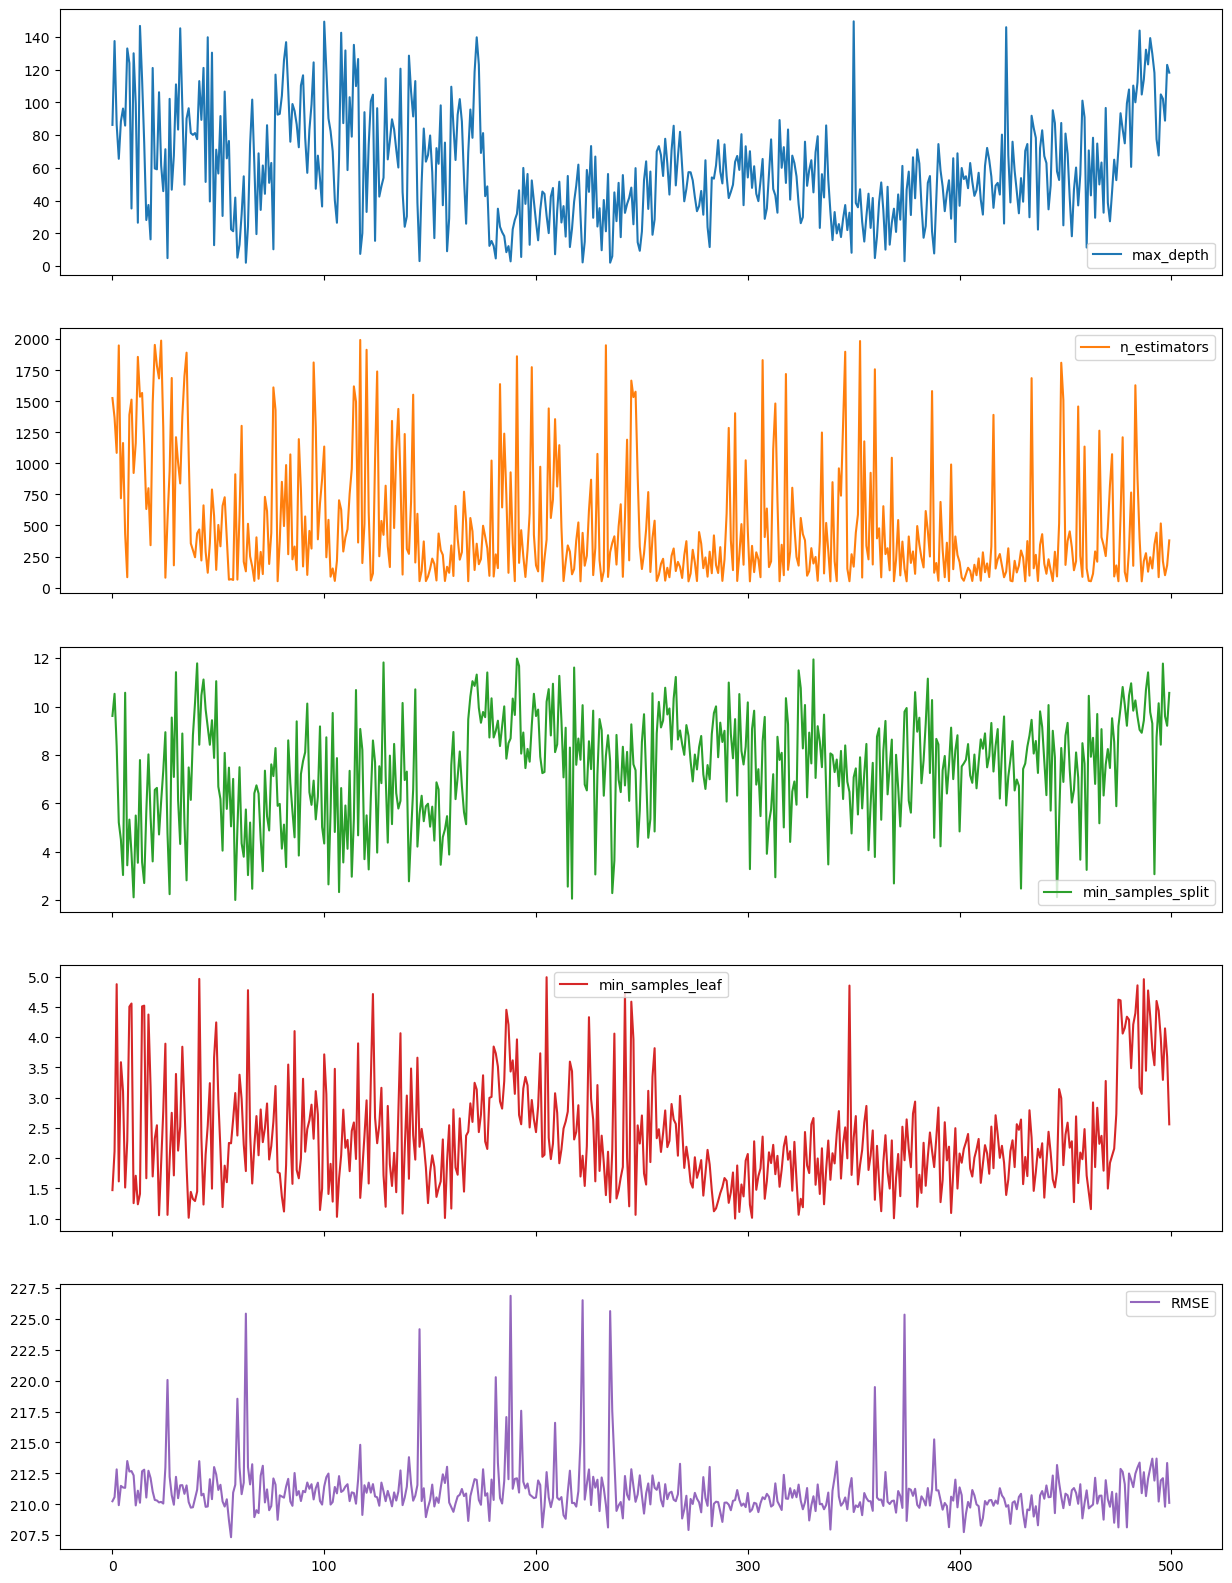

In [24]:
hyperopt_rfr[[
 'max_depth',
 'n_estimators',
 'min_samples_split',
 'min_samples_leaf',
 'RMSE']].plot(subplots=True,figsize=(15, 20))

# Use Customize code to get the performance of the model by volume breakdown

In [25]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer

class regressor_stratified_cv:
    def __init__(self,n_splits=10,n_repeats=5,group_count=10,random_state=37914,strategy='quantile'):
        self.group_count=group_count
        self.strategy=strategy
        self.cvkwargs=dict(n_splits=n_splits,n_repeats=n_repeats,random_state=random_state)
        self.cv=RepeatedStratifiedKFold(**self.cvkwargs)
        self.discretizer=KBinsDiscretizer(n_bins=self.group_count,encode='ordinal',strategy=self.strategy)  
            
    def split(self,X,y,groups=None):
        kgroups=self.discretizer.fit_transform(y[:,None])[:,0]
        return self.cv.split(X,kgroups,groups)
    
    def get_n_splits(self,X,y,groups=None):
        return self.cv.get_n_splits(X,y,groups)

In [31]:
 pd.Series(pd.qcut(model_data.AADB,3).value_counts())

(0.999, 51.0]      1422
(51.0, 137.0]      1404
(137.0, 3243.0]    1394
Name: AADB, dtype: int64

In [33]:
import warnings
warnings.filterwarnings('ignore')
# Lets breakdown this results by volume bin
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html
# Now we do 10fold cv for our NB:
#num_folds = 10
n_splits=10
n_repeats=10
group_count=10
kfold = regressor_stratified_cv(n_splits=n_splits,n_repeats=n_repeats,
        group_count=group_count,random_state=94704,strategy='quantile') #another option uniform

# Now we perform KFold:

fold_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []



# we split the entire dataframe:
for train, test in kfold.split(X_data, Y_data):
    rf_CV_model = RandomForestRegressor(random_state= 94704,n_estimators=68,max_depth=22,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',bootstrap=False).fit(X_data.iloc[train], Y_data.iloc[train])
    train_predictions = rf_CV_model.predict(X_data.iloc[train])
    test_predictions = rf_CV_model.predict(X_data.iloc[test])
    predictions_df = pd.DataFrame([X_data.iloc[test].index,rf_CV_model.predict(X_data.iloc[test]),Y_data.iloc[test]]).transpose()
    train_mape = mean_absolute_percentage_error(Y_data.iloc[train], train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_data.iloc[test], test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_data.iloc[train], train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_data.iloc[test], test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_data.iloc[train], train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_data.iloc[test], test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_data.iloc[train], train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_data.iloc[test], test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-51), medium (52-138), high (>= 138)
    low_Y_test_mask = np.all([Y_data.iloc[test] >= 0, Y_data.iloc[test] <=51], axis=0)
    med_Y_test_mask = np.all([Y_data.iloc[test] >= 52, Y_data.iloc[test] <=137], axis=0)
    high_Y_test_mask = np.all([Y_data.iloc[test] >= 138],axis=0)
   
    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y[test][low_Y_test_mask].shape[0]}), MED (n={Y[test][med_Y_test_mask].shape[0]}), HIGH (n={Y[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for linear Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 100):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))        

------------------------------------------Fold 1------------------------------------------
	Train MAE: 31.336561956096673	Score Loss: 63.62365302079811
	Train RMSE: 80.02526382122319	Score RMSE: 152.4064699079315
	Train MAPE: 40.17040900529311	Score MAPE: 82.97979867690962
	Train R2:   0.9106812928273088	Score R2: 0.6853934810324818

	3-VOLUME SCORES: LOW (n=148), MED (n=136), HIGH (n=138), TOTAL IN FOLD (n=422)
	Low Loss: 39.81914669845086	Med Loss: 31.340118455053872	High Loss: 120.96878082259961
	Low RMSE: 69.48207761923534	Med RMSE: 46.775335985071465	High RMSE: 252.38049009104077
	Low MAPE: 172.72457066610562	Med MAPE: 39.983626352156975	High MAPE: 29.10482173318025
	Low R2:   -30.87097795124453	Med R2: -2.7029803670374535	High R2: -2.7029803670374535
------------------------------------------Fold 2------------------------------------------
	Train MAE: 32.064658134773246	Score Loss: 65.33615268873068
	Train RMSE: 84.12998731993099	Score RMSE: 122.56428600856017
	Train MAPE: 40.982

------------------------------------------Fold 12------------------------------------------
	Train MAE: 31.351539326691572	Score Loss: 62.185008973497695
	Train RMSE: 84.75619605921398	Score RMSE: 114.93380565546599
	Train MAPE: 41.05836152901857	Score MAPE: 85.43289174124679
	Train R2:   0.9013999421196014	Score R2: 0.7916823180551275

	3-VOLUME SCORES: LOW (n=145), MED (n=138), HIGH (n=139), TOTAL IN FOLD (n=422)
	Low Loss: 35.63345140965128	Med Loss: 30.354357955078672	High Loss: 121.48433046486146
	Low RMSE: 55.044677118665554	Med RMSE: 42.44181995885192	High RMSE: 187.49788720705266
	Low MAPE: 180.8596790472814	Med MAPE: 37.67973850496952	High MAPE: 33.29656790837804
	Low R2:   -17.551531868205156	Med R2: -1.7878875117814665	High R2: -1.7878875117814665
------------------------------------------Fold 13------------------------------------------
	Train MAE: 32.70522969646276	Score Loss: 60.457287454414306
	Train RMSE: 87.42613468421708	Score RMSE: 101.90517868389966
	Train MAPE: 40.

------------------------------------------Fold 23------------------------------------------
	Train MAE: 30.222820477322873	Score Loss: 72.95416913896474
	Train RMSE: 77.51467285686452	Score RMSE: 171.72433555507914
	Train MAPE: 37.752937302679825	Score MAPE: 107.60682961881164
	Train R2:   0.9095938795536443	Score R2: 0.7556253836894876

	3-VOLUME SCORES: LOW (n=140), MED (n=143), HIGH (n=139), TOTAL IN FOLD (n=422)
	Low Loss: 42.308665793441556	Med Loss: 38.401988711446656	High Loss: 139.36663150952833
	Low RMSE: 69.50936817457273	Med RMSE: 66.67492848359605	High RMSE: 282.9995043392955
	Low MAPE: 241.41123310600645	Med MAPE: 49.69798054883677	High MAPE: 32.415095293625576
	Low R2:   -31.986082349872433	Med R2: -6.6165006463471965	High R2: -6.6165006463471965
------------------------------------------Fold 24------------------------------------------
	Train MAE: 31.661630888576706	Score Loss: 65.66094677439592
	Train RMSE: 84.42021886843429	Score RMSE: 124.3458876617604
	Train MAPE: 43

------------------------------------------Fold 34------------------------------------------
	Train MAE: 31.513437017544483	Score Loss: 65.98882435710229
	Train RMSE: 83.96092968024716	Score RMSE: 127.46944972001089
	Train MAPE: 40.294960017434214	Score MAPE: 98.14803735593432
	Train R2:   0.9038158433453578	Score R2: 0.7268117193333307

	3-VOLUME SCORES: LOW (n=146), MED (n=138), HIGH (n=138), TOTAL IN FOLD (n=422)
	Low Loss: 46.39243165212464	Med Loss: 34.629308363479026	High Loss: 118.08075582120915
	Low RMSE: 130.0195969991492	Med RMSE: 60.02577418805673	High RMSE: 167.92595650595115
	Low MAPE: 214.06767933409455	Med MAPE: 39.86656146208127	High MAPE: 33.7898920265164
	Low R2:   -106.88463150750346	Med R2: -4.855606949276487	High R2: -4.855606949276487
------------------------------------------Fold 35------------------------------------------
	Train MAE: 31.154355842194708	Score Loss: 71.63499212964227
	Train RMSE: 84.29595879135097	Score RMSE: 136.8914963798027
	Train MAPE: 39.7562

------------------------------------------Fold 45------------------------------------------
	Train MAE: 31.656983391798104	Score Loss: 63.754349142358556
	Train RMSE: 83.59088331190598	Score RMSE: 124.67072520119162
	Train MAPE: 42.35940665718289	Score MAPE: 82.21698294237953
	Train R2:   0.9006183296061734	Score R2: 0.8199092110839618

	3-VOLUME SCORES: LOW (n=150), MED (n=136), HIGH (n=136), TOTAL IN FOLD (n=422)
	Low Loss: 39.33855642837947	Med Loss: 32.44154004383046	High Loss: 121.99634138130477
	Low RMSE: 60.85383490262013	Med RMSE: 45.391837505509834	High RMSE: 205.14273917564324
	Low MAPE: 169.14365379555454	Med MAPE: 38.25231449473829	High MAPE: 30.30664677254833
	Low R2:   -24.54235981749042	Med R2: -2.374140346632874	High R2: -2.374140346632874
------------------------------------------Fold 46------------------------------------------
	Train MAE: 30.740772414346377	Score Loss: 70.89481547491633
	Train RMSE: 77.99874723922991	Score RMSE: 169.1779691159077
	Train MAPE: 39.4498

------------------------------------------Fold 56------------------------------------------
	Train MAE: 32.33818298661127	Score Loss: 59.46260050465004
	Train RMSE: 86.16858434753262	Score RMSE: 103.40501708683523
	Train MAPE: 41.60740568236715	Score MAPE: 79.72342510272058
	Train R2:   0.8941013112902852	Score R2: 0.8785383825794618

	3-VOLUME SCORES: LOW (n=140), MED (n=146), HIGH (n=136), TOTAL IN FOLD (n=422)
	Low Loss: 33.15746855899983	Med Loss: 40.086520646956195	High Loss: 107.34220441357893
	Low RMSE: 45.52872366009895	Med RMSE: 72.34235694768434	High RMSE: 159.45671296186813
	Low MAPE: 163.98262761108586	Med MAPE: 45.82368826492203	High MAPE: 29.37837530233419
	Low R2:   -14.26816627881552	Med R2: -7.156879012076587	High R2: -7.156879012076587
------------------------------------------Fold 57------------------------------------------
	Train MAE: 31.455850997155874	Score Loss: 62.646680394200104
	Train RMSE: 85.63394600772463	Score RMSE: 114.06678827303418
	Train MAPE: 40.9818

------------------------------------------Fold 67------------------------------------------
	Train MAE: 31.085180605889143	Score Loss: 66.45834211655425
	Train RMSE: 83.69682066323628	Score RMSE: 129.13192156902912
	Train MAPE: 39.31357904464043	Score MAPE: 106.19198488066144
	Train R2:   0.9022876859177099	Score R2: 0.7743281799108758

	3-VOLUME SCORES: LOW (n=139), MED (n=145), HIGH (n=138), TOTAL IN FOLD (n=422)
	Low Loss: 47.453148716683216	Med Loss: 34.417589760005285	High Loss: 119.26726222004463
	Low RMSE: 118.48009693713281	Med RMSE: 52.45366706244489	High RMSE: 184.28679909348463
	Low MAPE: 248.80331248472416	Med MAPE: 41.02060805846956	High MAPE: 31.024413157857882
	Low R2:   -94.5831116890935	Med R2: -3.323350403693775	High R2: -3.323350403693775
------------------------------------------Fold 68------------------------------------------
	Train MAE: 31.540511347149227	Score Loss: 66.57817288293718
	Train RMSE: 82.56987090773613	Score RMSE: 136.61259930854715
	Train MAPE: 41.6

------------------------------------------Fold 78------------------------------------------
	Train MAE: 30.899202485754646	Score Loss: 73.6218646084043
	Train RMSE: 82.90918352490625	Score RMSE: 148.97165855754693
	Train MAPE: 40.627660915206704	Score MAPE: 97.21066760257064
	Train R2:   0.9020412283454214	Score R2: 0.7465441641185102

	3-VOLUME SCORES: LOW (n=143), MED (n=136), HIGH (n=143), TOTAL IN FOLD (n=422)
	Low Loss: 47.48235153829911	Med Loss: 30.223978625605014	High Loss: 141.03489162019267
	Low RMSE: 87.12416683009975	Med RMSE: 46.5869559126236	High RMSE: 236.29767676028712
	Low MAPE: 216.63771053969788	Med MAPE: 36.158955928708394	High MAPE: 35.84679101261308
	Low R2:   -53.44445525833581	Med R2: -2.892243015442829	High R2: -2.892243015442829
------------------------------------------Fold 79------------------------------------------
	Train MAE: 31.448062196105322	Score Loss: 68.85202719806514
	Train RMSE: 85.13902977898638	Score RMSE: 124.75663867491552
	Train MAPE: 41.4979

------------------------------------------Fold 89------------------------------------------
	Train MAE: 32.702828820589396	Score Loss: 54.27387559263082
	Train RMSE: 87.06058530566064	Score RMSE: 94.05316677857341
	Train MAPE: 42.112730008728235	Score MAPE: 82.87239691567764
	Train R2:   0.8975929024891263	Score R2: 0.8329346719691599

	3-VOLUME SCORES: LOW (n=144), MED (n=141), HIGH (n=137), TOTAL IN FOLD (n=422)
	Low Loss: 34.57045337029837	Med Loss: 33.97581757180255	High Loss: 95.8747440667378
	Low RMSE: 48.68770088981699	Med RMSE: 56.257127704098565	High RMSE: 146.62665410701015
	Low MAPE: 176.1661665935137	Med MAPE: 41.54454221801506	High MAPE: 27.346299680364023
	Low R2:   -13.6201336038558	Med R2: -3.9385024444715393	High R2: -3.9385024444715393
------------------------------------------Fold 90------------------------------------------
	Train MAE: 31.58940959852778	Score Loss: 67.02700052521837
	Train RMSE: 84.01540607932097	Score RMSE: 132.4758824094068
	Train MAPE: 41.7771678

------------------------------------------Fold 100------------------------------------------
	Train MAE: 32.11538410248235	Score Loss: 62.92638597868547
	Train RMSE: 86.76462193343636	Score RMSE: 110.31405789527435
	Train MAPE: 42.0297326951001	Score MAPE: 76.05657558347929
	Train R2:   0.8952470919305685	Score R2: 0.8317593395513773

	3-VOLUME SCORES: LOW (n=143), MED (n=143), HIGH (n=136), TOTAL IN FOLD (n=422)
	Low Loss: 34.78115554695025	Med Loss: 34.95910677142628	High Loss: 121.92703949615749
	Low RMSE: 55.68990743211525	Med RMSE: 56.16253301655022	High RMSE: 176.58626752557277
	Low MAPE: 151.33814658687334	Med MAPE: 41.70784988354479	High MAPE: 33.01689265410638
	Low R2:   -21.004423461584246	Med R2: -3.55474152347404	High R2: -3.55474152347404


Low MAE Average: 41.63807625224575 +/- 8.086080863698827
Low RMSE Average: 84.60420636722594 +/- 46.18020685715055
Low MAPE Average: 196.49371443616644 +/- 34.73923133304397
Low R2 Average: -61.745667532581116 +/- 85.54026084936136


Me

In [36]:
appended_data1=appended_data.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
appended_data2=appended_data1.groupby('Index_ID').mean()
graph_data=pd.merge(track,appended_data2,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_data.head()

,tdg_id,Leg,county,year,AADB,index,Mean Predicted AADB,Observed AADB
0,208578,NaN,Alameda,2018,31,0,329.08,31.00
1,221803,NaN,Alameda,2019,35,1,150.89,35.00
2,221803,NaN,Alameda,2019,67,2,136.97,67.00
3,214389,NaN,Alameda,2017,191,3,193.53,191.00
4,214389,NaN,Alameda,2018,214,4,179.36,214.00


In [37]:
#graph_data['Mean Predicted ATT in Million'].max()

In [38]:
#graph_data['Observed ATT in Million'].max()

In [39]:
graph_data.shape

(4220, 8)

In [40]:
graph_data['Observed AADB'].max(), graph_data['Mean Predicted AADB'].max()

(3243.0, 3051.2971813725508)

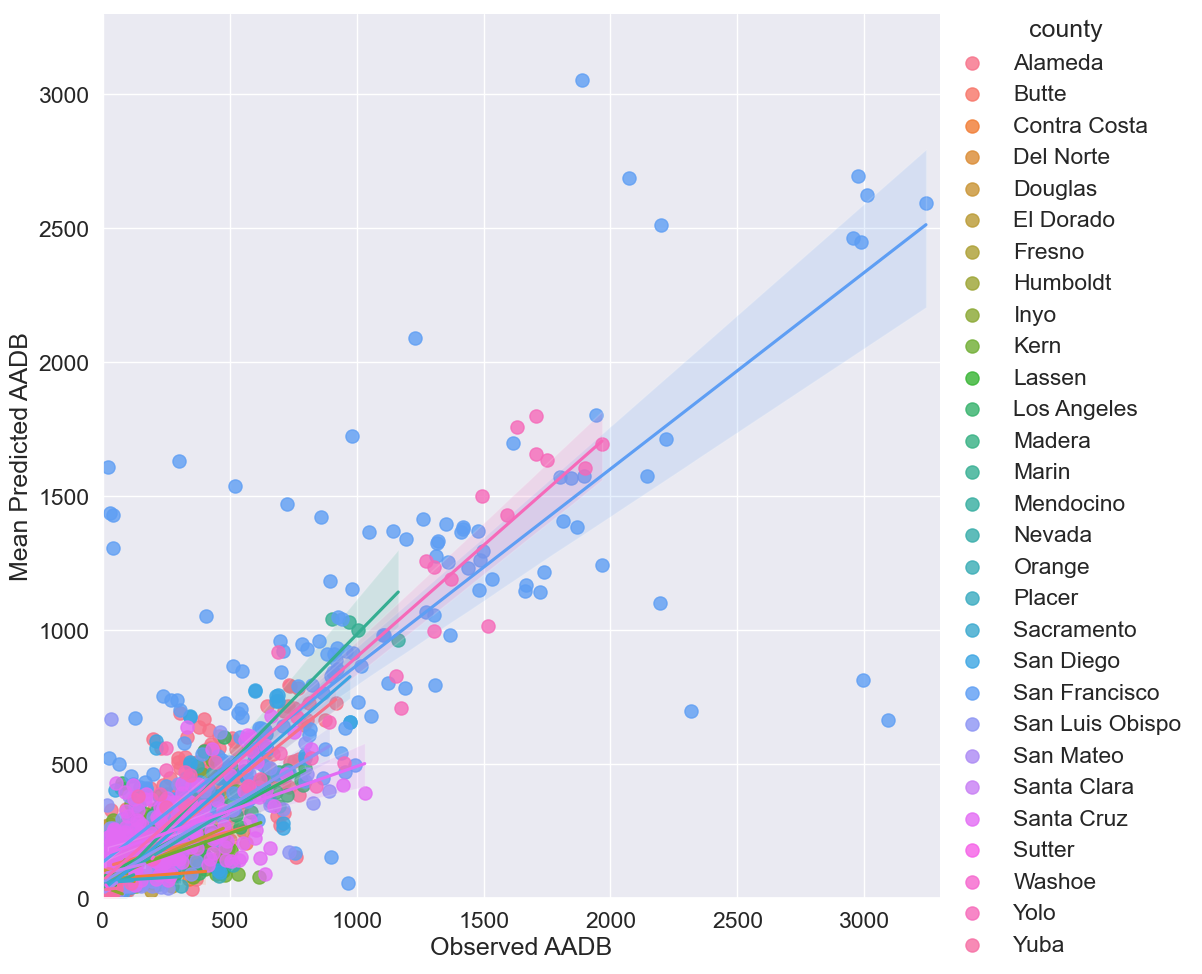

In [42]:
 sns.set(font_scale =1.5)
 g1=sns.lmplot(x="Observed AADB", y="Mean Predicted AADB", hue="county",data=graph_data,height=10, aspect=1.0,scatter_kws={"s": 90})
 plt.ticklabel_format(style='plain', axis='y')
#markers=["o", "x","*", "+","d", "X"]
 g2=g1.set(xlim=(0,3300))
 g3=g2.set(ylim=(0,3300))

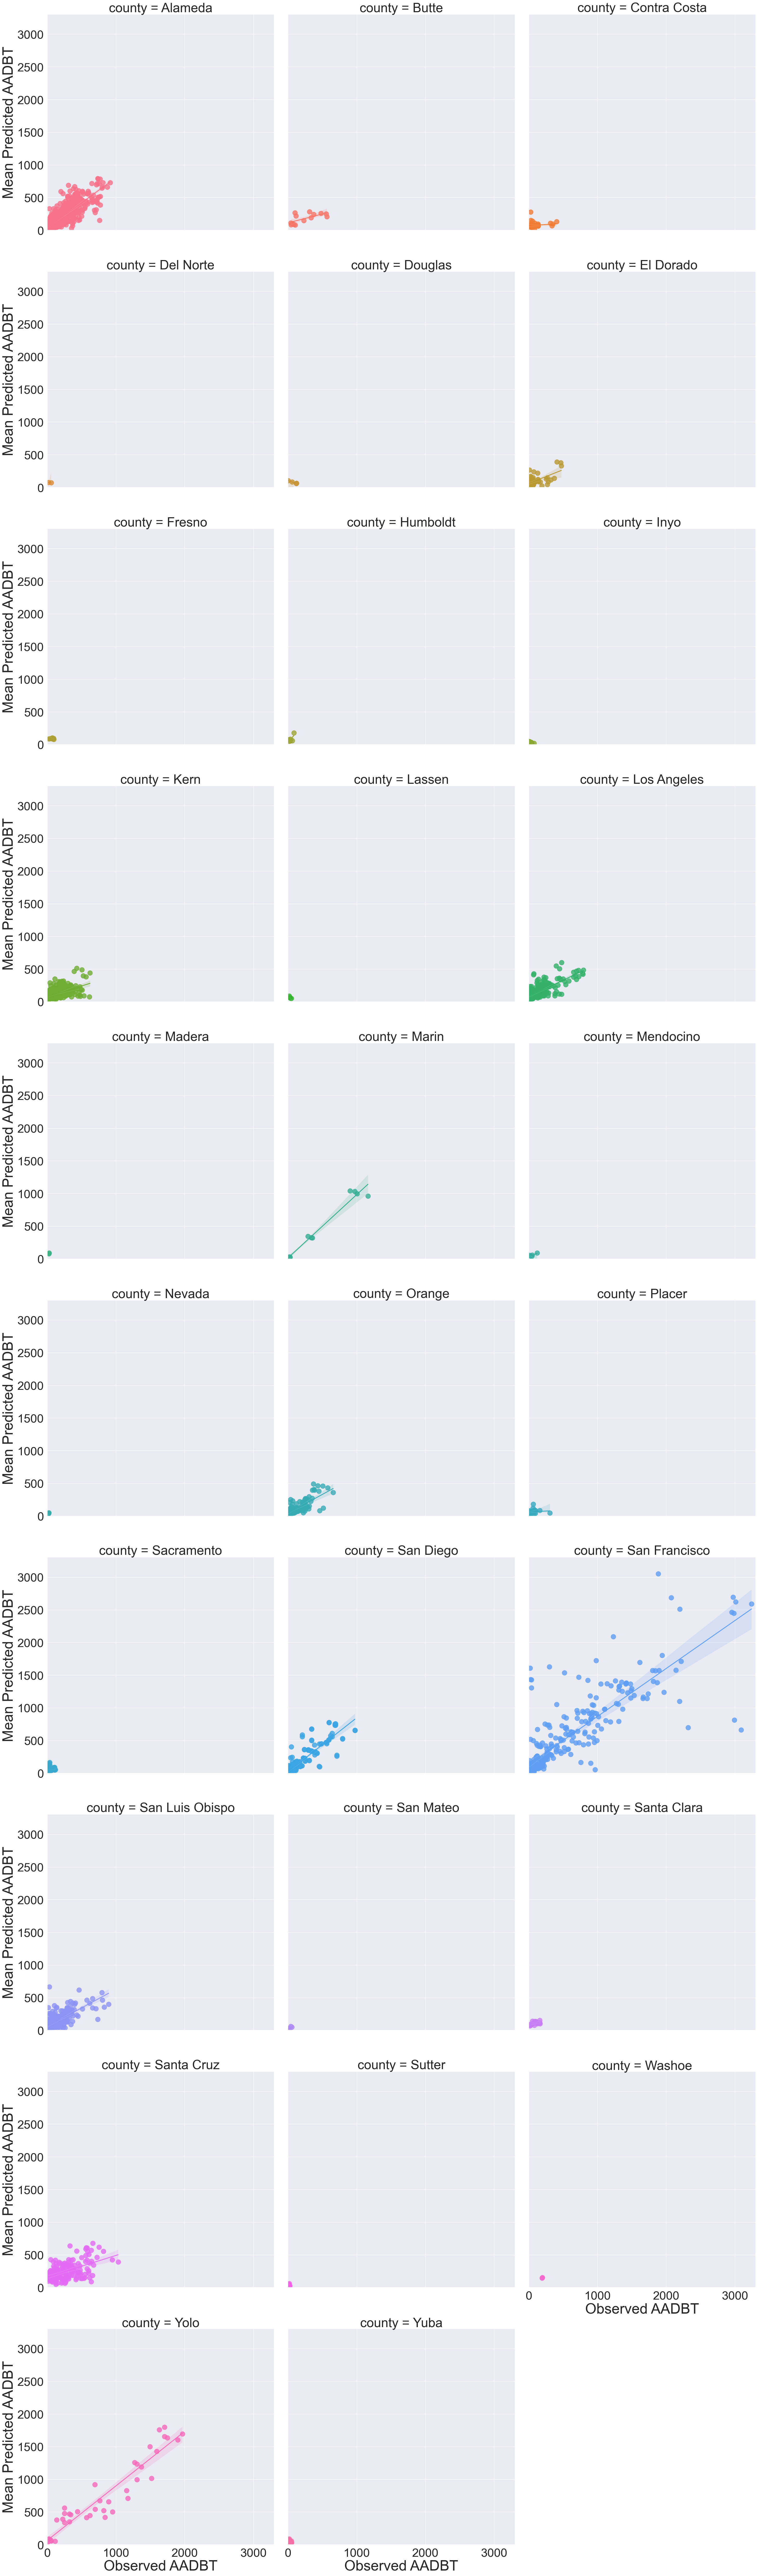

In [43]:
 sns.set(font_scale=3) 
 g3=sns.lmplot(x="Observed AADB", y="Mean Predicted AADB", col='county', hue="county", data=graph_data, col_wrap=3, height=10, aspect=1.0,scatter_kws={"s": 180},fit_reg=True)
 g31=g3.set_axis_labels("Observed AADBT", "Mean Predicted AADBT",size=40)
 g32=g31.set(xlim=(0,3300))
 g33=g32.set(ylim=(0,3300))

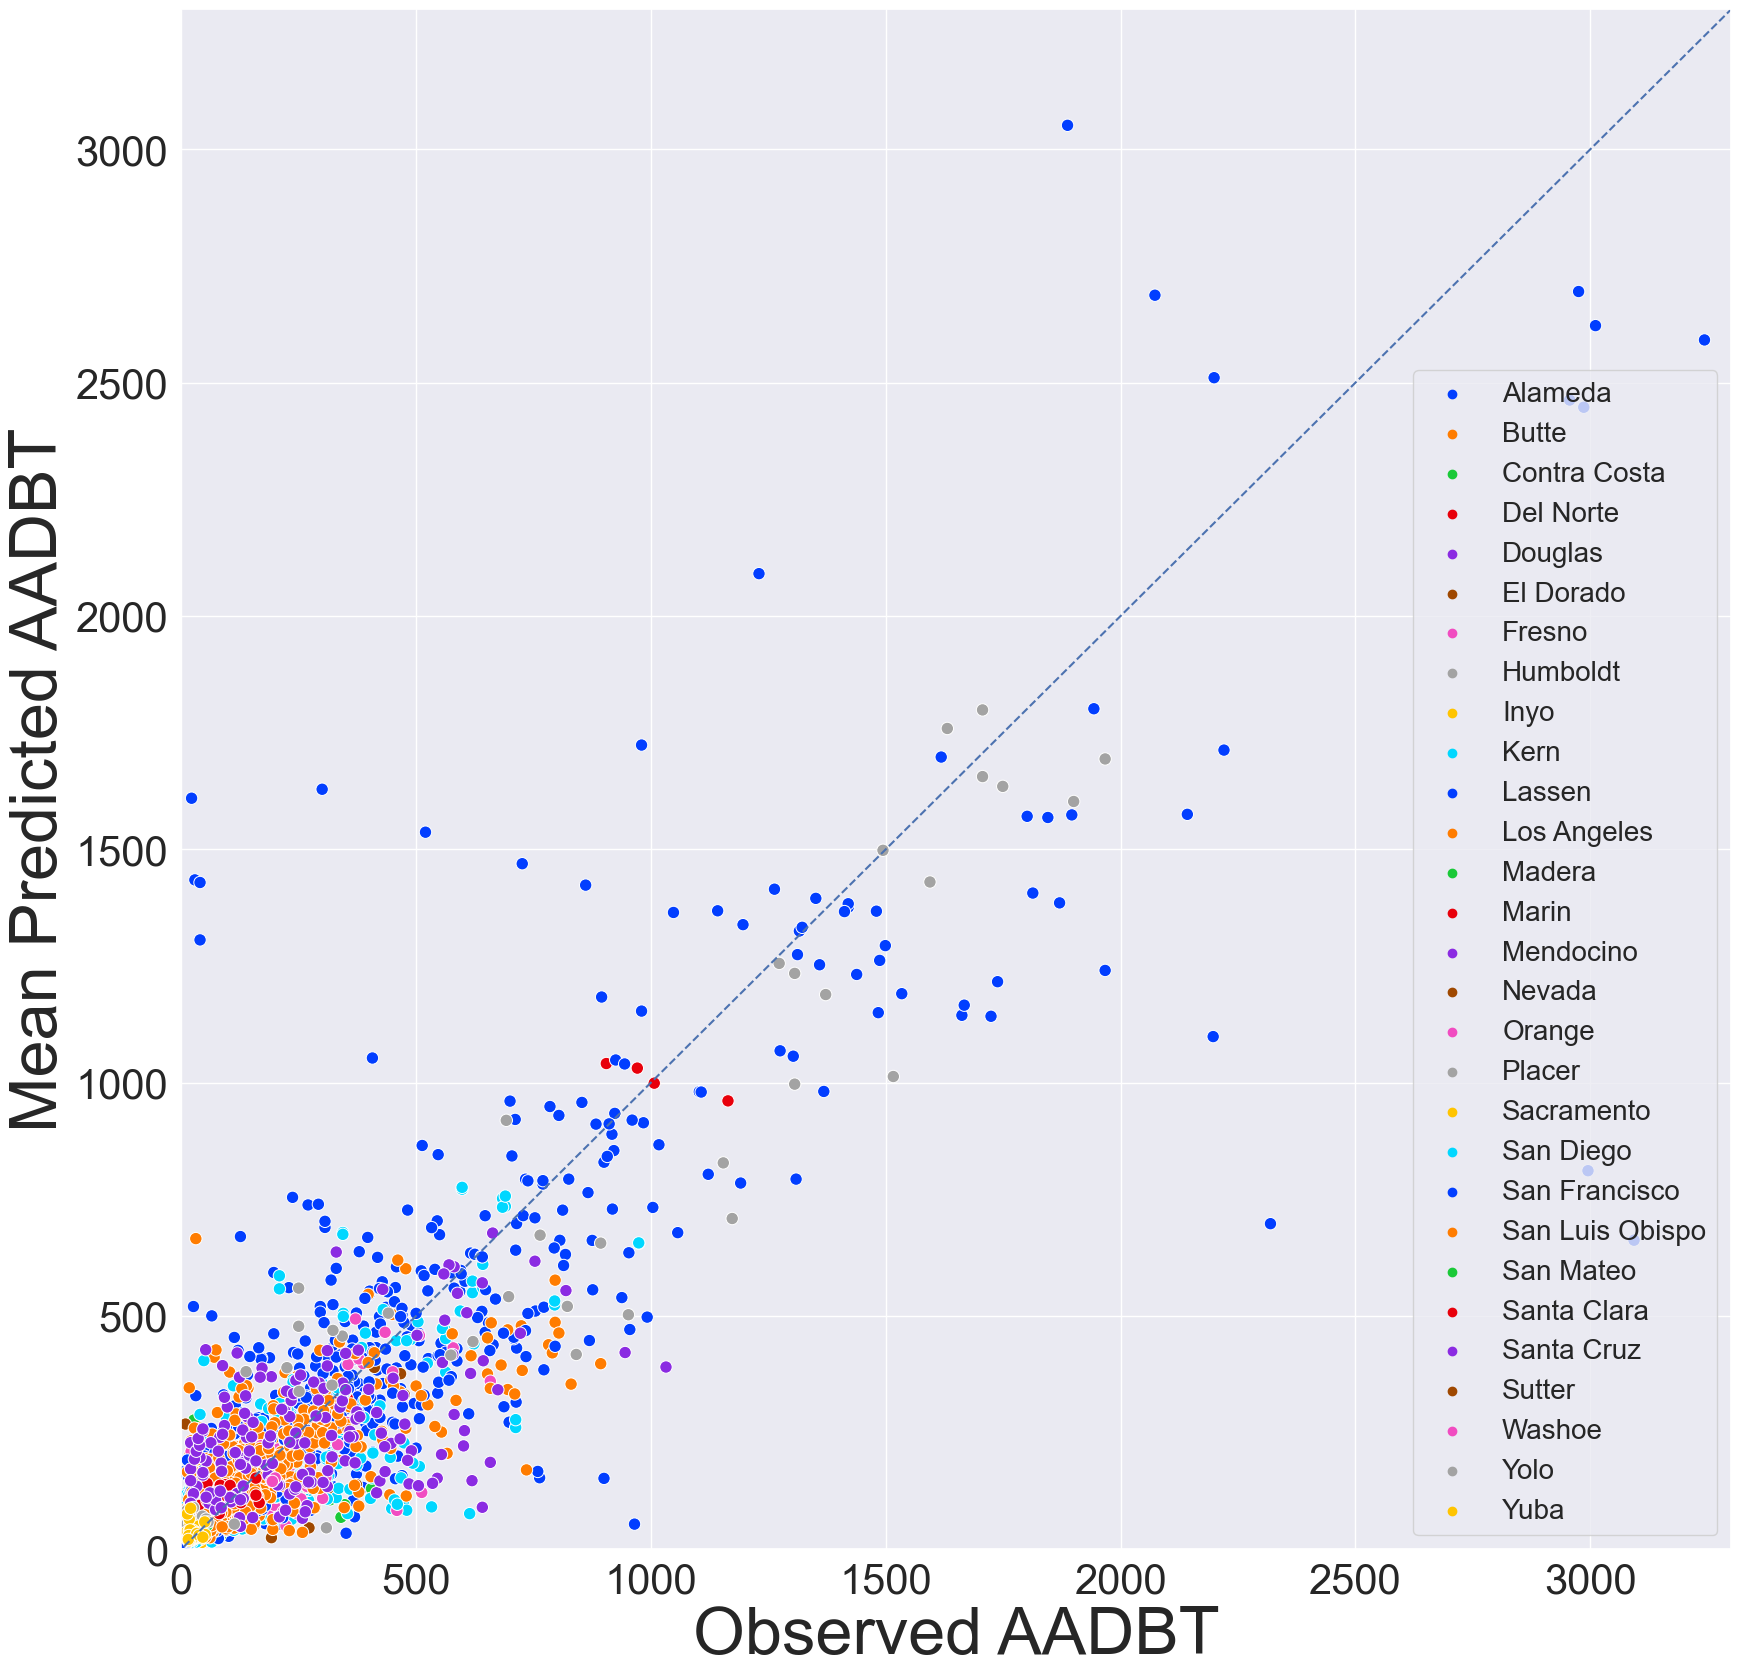

In [48]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_data, x="Observed AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,3300)
plt.ylim(0,3300)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [49]:
importances = list(rf_CV_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances

[('Stv_commute_adb', 0.1551),
 ('pctbiketowork_q', 0.0792),
 ('totatleastbachelorspersqmi_h', 0.0705),
 ('Stv_leisure_adb', 0.0702),
 ('totnovehpersqmi_h', 0.0583),
 ('hshlddensitysqmi_h', 0.043),
 ('totwhitepersqmi_t', 0.0342),
 ('dist_ferry', 0.0342),
 ('d3apo', 0.0342),
 ('popdensitysqmi_h', 0.0339),
 ('near_large_univ_miles', 0.0293),
 ('dist_subway', 0.0263),
 ('dist_amtrak', 0.0263),
 ('d5br', 0.0262),
 ('pctlowintensity_h', 0.0239),
 ('d5be', 0.0236),
 ('d1a', 0.0227),
 ('pct_low_wage', 0.0218),
 ('d3b', 0.0213),
 ('d3bpo4', 0.019),
 ('exist_bike_parking_q', 0.0186),
 ('near_univ_miles', 0.017),
 ('dist_water', 0.0156),
 ('slope', 0.014),
 ('Stv_Ave_speed', 0.0135),
 ('empnum_density_t', 0.013),
 ('dist_busstop', 0.0119),
 ('speed', 0.0111),
 ('secondary', 0.0058),
 ('Minor_Arterial', 0.0047),
 ('path', 0.0047),
 ('Principal_Arterial', 0.004),
 ('bike_route', 0.0036),
 ('Local', 0.003),
 ('residential', 0.002),
 ('bike_lane', 0.0015),
 ('tertiary', 0.0014),
 ('primary', 0.0009),

<AxesSubplot: xlabel='Variable', ylabel='Importance'>

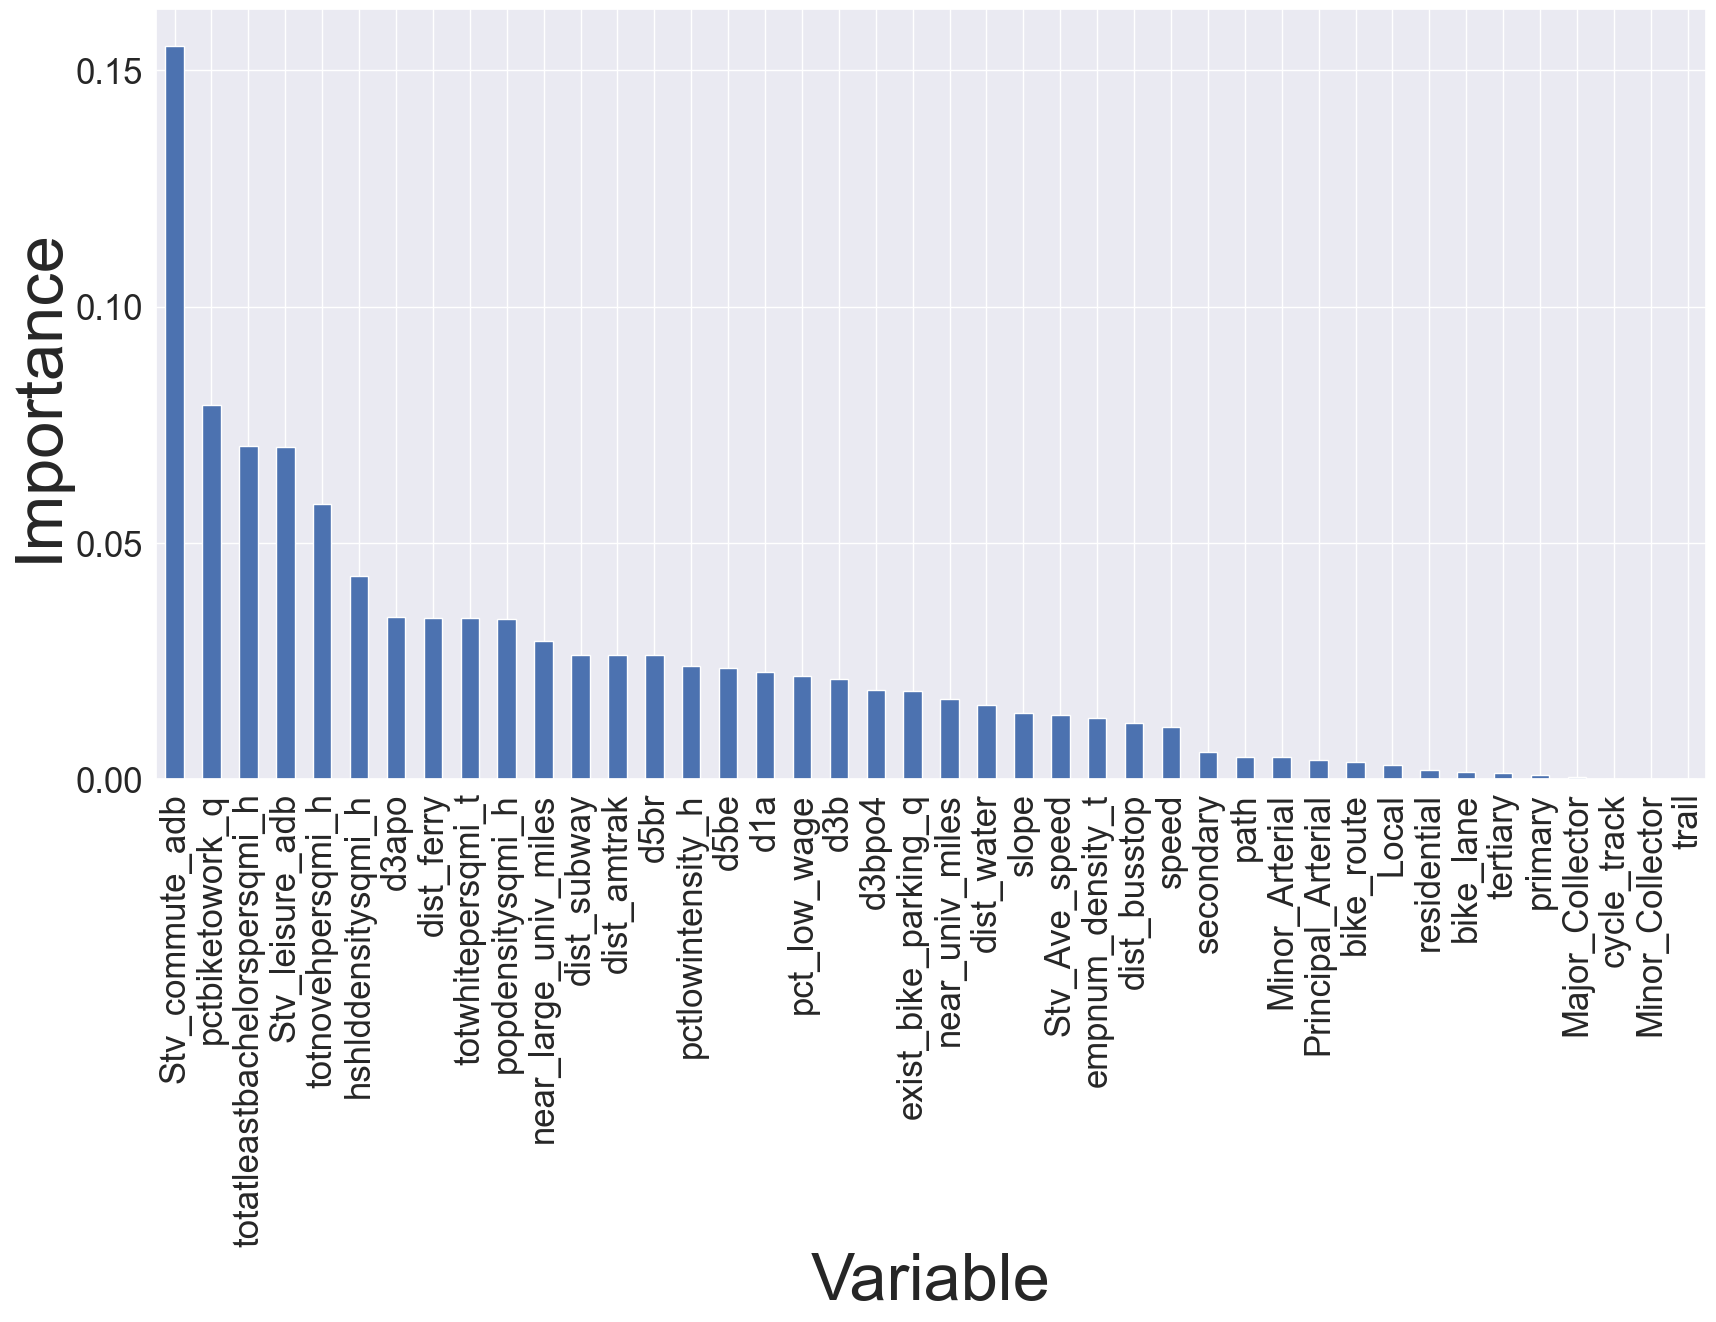

In [50]:
feature_importances_df = pd.DataFrame(rf_CV_model.feature_importances_, index=X_data.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_df.plot(kind='bar', figsize=(20, 10), style='fivethirtyeight', fontsize=25, legend=False,
                          ylabel="Importance", xlabel="Variable")


In [51]:
feature_importances_df

,Importance
Stv_commute_adb,0.16
pctbiketowork_q,0.08
totatleastbachelorspersqmi_h,0.07
Stv_leisure_adb,0.07
totnovehpersqmi_h,0.06
hshlddensitysqmi_h,0.04
d3apo,0.03
dist_ferry,0.03
totwhitepersqmi_t,0.03
popdensitysqmi_h,0.03


# End of the Modeling

In [52]:
# Plot Poisson Regression Prediction
pdata=pd.read_csv('D:/Bike Exposure/Modeling/Poisson_Regression_model_outcomes_july23_AADBT.csv')
pdata.head()

,Unnamed: 0,tdg_id,year,Leg,county,Lat,Long,geometry,obs,rowIndex,pred
0,1,200671,2016,NaN,San Francisco,37.79,-122.46,LINESTRING (547596.1582000004 4182777.31870000...,31,1,223.80
1,2,200671,2017,NaN,San Francisco,37.79,-122.46,LINESTRING (547596.1582000004 4182777.31870000...,35,2,188.38
2,3,200671,2018,NaN,San Francisco,37.79,-122.46,LINESTRING (547596.1582000004 4182777.31870000...,67,3,189.02
3,4,200671,2019,NaN,San Francisco,37.79,-122.46,LINESTRING (547596.1582000004 4182777.31870000...,191,4,33.53
4,5,201127,2016,NaN,San Francisco,37.80,-122.42,LINESTRING (551109.0690000001 4183354.03250000...,214,5,33.79


In [53]:
pdata=pdata.sort_values('county')
pdata.head()

,Unnamed: 0,tdg_id,year,Leg,county,Lat,Long,geometry,obs,rowIndex,pred
2079,2080,155328,2016,S,Alameda,37.53,-122.05,LINESTRING (583788.5015000002 4153597.56609999...,104,2126,199.99
2500,2501,157027,2017,E,Alameda,37.80,-122.25,"LINESTRING (565940.0280999998 4183791.9934, 56...",21,2549,143.32
2501,2502,157074,2017,E,Alameda,37.76,-122.24,"LINESTRING (566688.8002000004 4179923.7181, 56...",378,2550,214.10
2502,2503,157142,2017,E,Alameda,37.76,-122.24,"LINESTRING (567178.7326999996 4179989.5012, 56...",97,2551,90.97
2503,2504,157363,2017,E,Alameda,37.79,-122.23,"LINESTRING (568083.9020999996 4183191.8343, 56...",37,2552,78.68


In [54]:
pdata['Mean Predicted AADBT']=pdata['pred']
pdata['Observed AADBT']=pdata['obs']

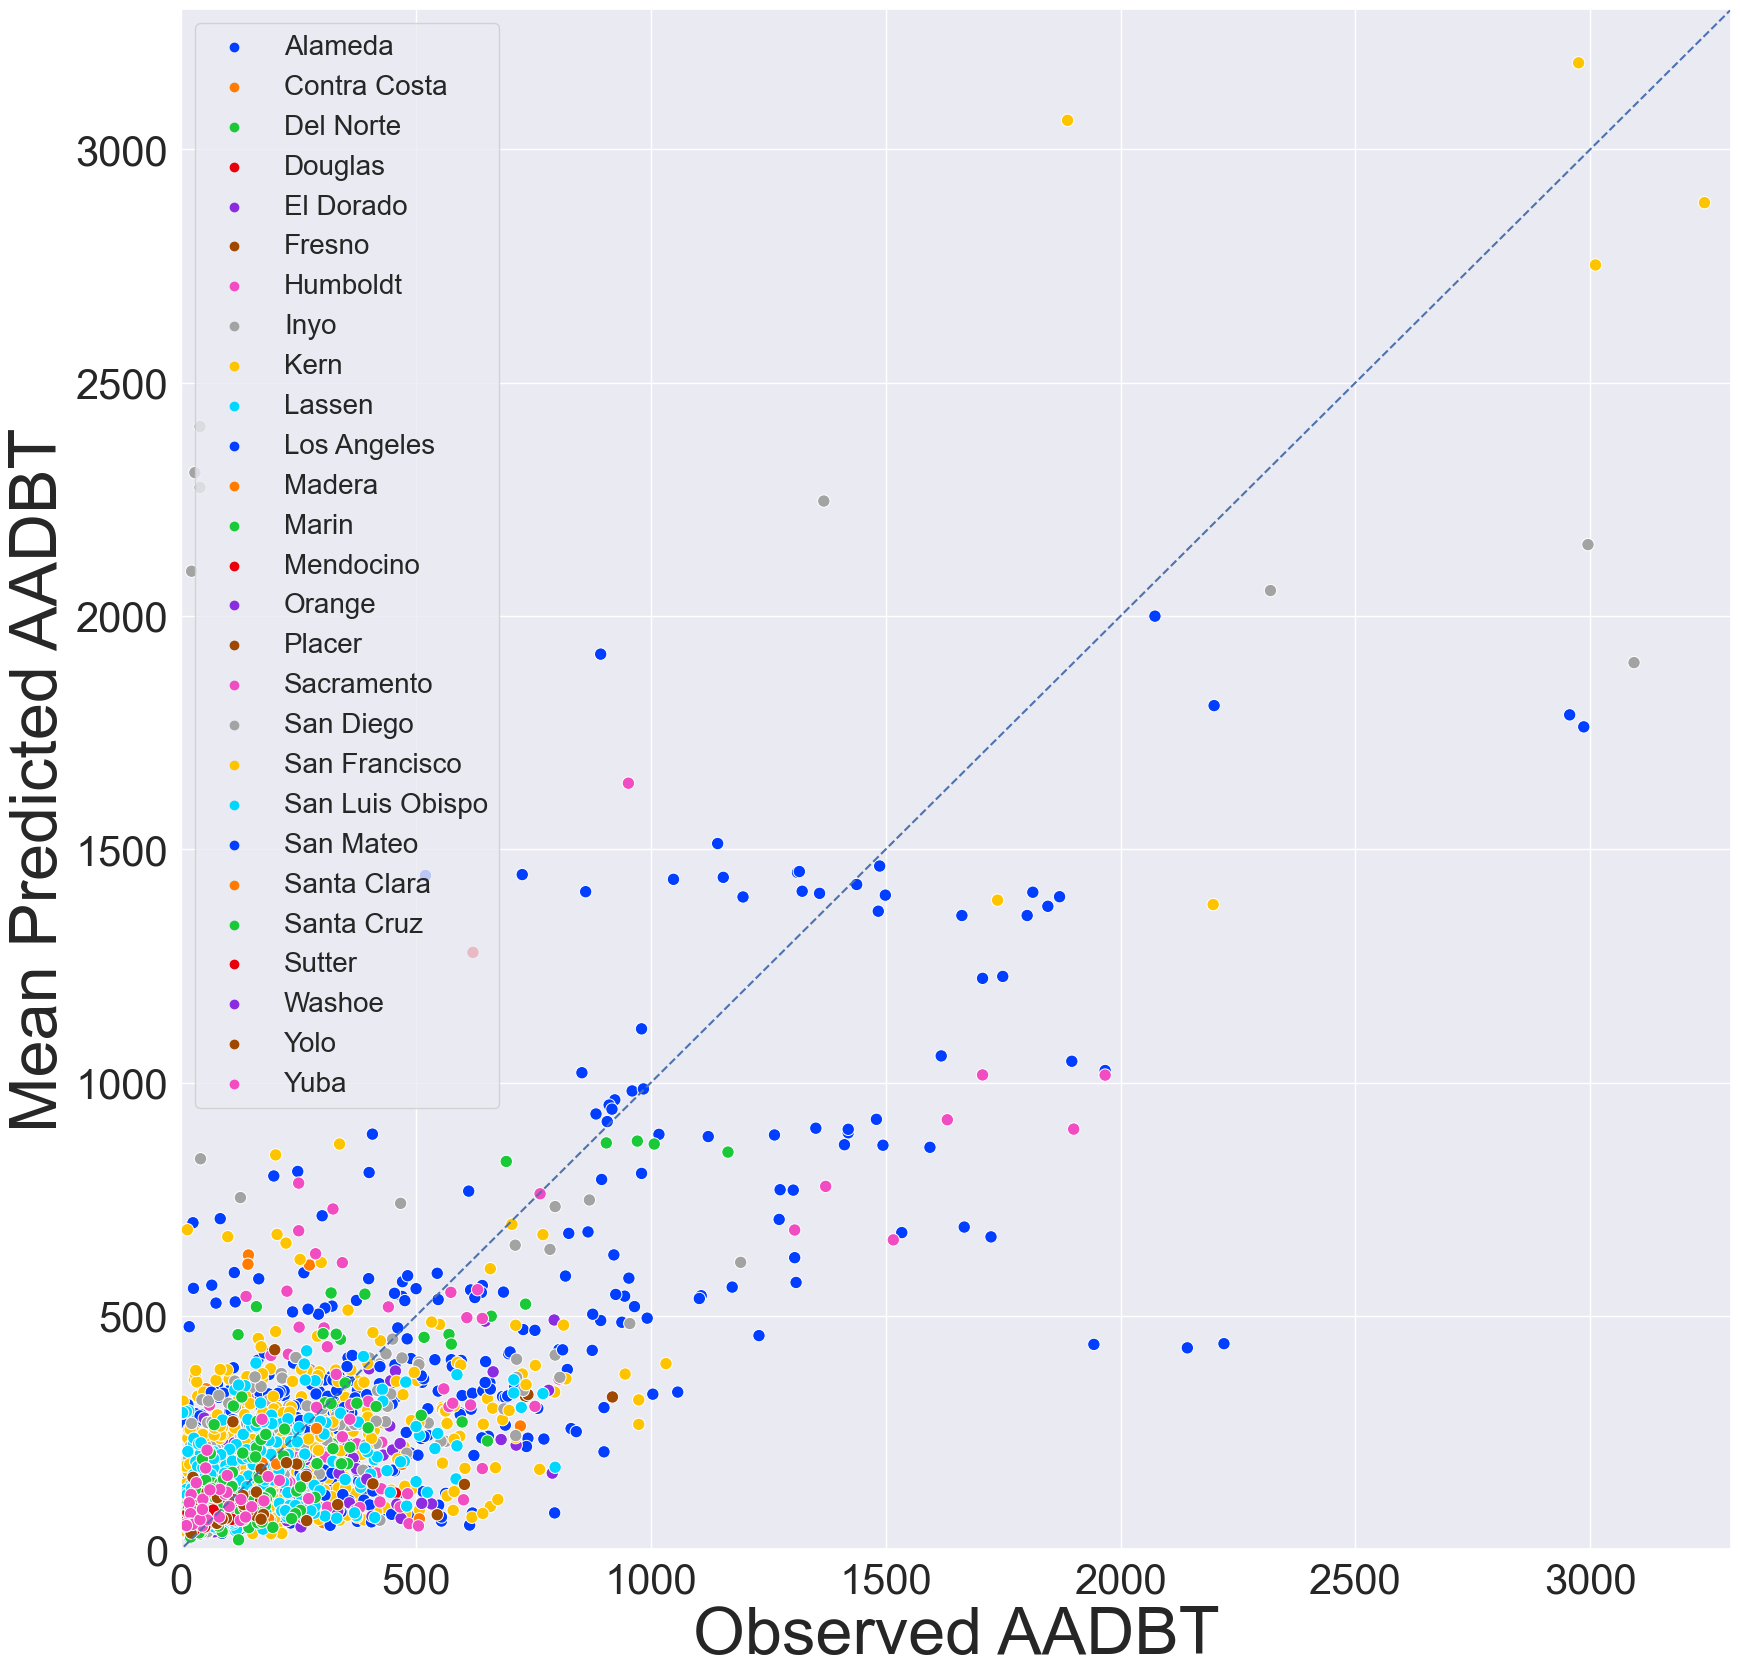

In [56]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=pdata, x="Observed AADBT", y="Mean Predicted AADBT", hue="county", palette="bright",s=80)
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,3300)
plt.ylim(0,3300)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [46]:
list(pdata.columns)

['Unnamed: 0',
 'tdg_id',
 'year',
 'Leg',
 'county',
 'Lat',
 'Long',
 'geometry',
 'obs',
 'rowIndex',
 'pred',
 'Mean Predicted ATT in Million',
 'Observed ATT in Million']

# Apply RF Model to SHS

In [57]:
shs=pd.read_csv("D:/Bike Exposure/Modeling/SHS_application_data_july12.csv")
#shs=shs.loc[shs['year']==2019]
shs1=shs[['Stv_commute_adb', 'Stv_leisure_adb', 'Stv_Ave_speed','pctbiketowork_q',
                     'totatleastbachelorspersqmi_h','totnovehpersqmi_h','hshlddensitysqmi_h','popdensitysqmi_h','totwhitepersqmi_t',
                     'tertiary','speed', 'slope', 'empnum_density_t','Principal_Arterial', 'Minor_Arterial', 
                     'Major_Collector','Minor_Collector', 'Local','near_univ_miles', 'near_large_univ_miles','primary','secondary', 'residential','path',
       'bike_lane', 'bike_route', 'cycle_track', 'trail','dist_subway', 'dist_amtrak', 'dist_busstop',
 'dist_ferry','exist_bike_parking_q','pctlowintensity_h','pct_low_wage','dist_water','d1a','d3apo','d3b', 'd3bpo4','d5br',
 'd5be']]
shs1.head()

,Stv_commute_adb,Stv_leisure_adb,Stv_Ave_speed,pctbiketowork_q,totatleastbachelorspersqmi_h,totnovehpersqmi_h,hshlddensitysqmi_h,popdensitysqmi_h,totwhitepersqmi_t,tertiary,...,exist_bike_parking_q,pctlowintensity_h,pct_low_wage,dist_water,d1a,d3apo,d3b,d3bpo4,d5br,d5be
0,0.00,0.00,0.00,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.13,0.02,0.32,1.41,0.00,-99999.00,-99999.00
1,0.03,2.10,13.19,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.12,0.02,0.32,1.41,0.00,-99999.00,-99999.00
2,0.00,0.00,0.00,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.13,0.02,0.32,1.41,0.00,-99999.00,-99999.00
3,0.03,2.12,12.39,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.08,0.02,0.32,1.41,0.00,-99999.00,-99999.00
4,0.00,0.03,3.84,0.00,3.20,0.23,8.28,18.52,12.17,0,...,0.00,0.00,0.26,0.05,0.02,0.32,1.41,0.00,-99999.00,-99999.00


In [58]:
shs1.shape

(87550, 42)

In [59]:
shs1=shs1.fillna(0)

In [60]:
shs.shape

(87550, 198)

In [61]:
shs_track=shs[['tdg_id','county']].reset_index()
shs_track['index']=shs_track.index
shs_track.head()

,index,tdg_id,county
0,0,6496.00,Del Norte
1,1,6497.00,Del Norte
2,2,6498.00,Del Norte
3,3,6500.00,Del Norte
4,4,6507.00,Del Norte


In [62]:
shs_pred = np.asarray(shs1)

In [63]:
shs_predictions = rf_CV_model.predict(shs_pred)
shs_predictions_df = pd.DataFrame(shs_predictions,columns=['AADBT'])
shs_predictions_df['index']=shs_predictions_df.index
shs_prediction=pd.merge(shs_predictions_df,shs_track,on=['index'], how='inner')
shs_prediction.head()

,AADBT,index,tdg_id,county
0,63.67,0,6496.00,Del Norte
1,53.71,1,6497.00,Del Norte
2,62.71,2,6498.00,Del Norte
3,54.34,3,6500.00,Del Norte
4,52.62,4,6507.00,Del Norte


In [64]:
shs_prediction.shape

(87550, 4)

In [65]:
#shs_prediction['AADB']=shs_prediction['ATT']/365
shs_prediction['AADBT'].describe()

count   87550.00
mean      102.47
std        72.64
min         6.97
25%        66.35
50%        83.81
75%       111.05
max      2771.31
Name: AADBT, dtype: float64

In [67]:
#shs_prediction['ATT'].describe()

In [68]:
shs_prediction.head()

,AADBT,index,tdg_id,county
0,63.67,0,6496.00,Del Norte
1,53.71,1,6497.00,Del Norte
2,62.71,2,6498.00,Del Norte
3,54.34,3,6500.00,Del Norte
4,52.62,4,6507.00,Del Norte


In [69]:
shs_prediction.to_csv("D:/Bike Exposure/Modeling/SHS_estimated_ATT_july24_2023_AADBT.csv")

In [70]:
# Summarize the SHS AADBT by Percentage of millage
shs_aadbt=gpd.read_file('D:/Bike Exposure/Modeling/RF Model_SHS_estimate_July24/SHS_AADBT_Estimate.shp')
shs_aadbt.head()

,tdg_id,county,year,Length,Field1,AADBT,index,tdg_id_1,county_1,geometry
0,8523.00,El Dorado,2019.00,0.30,563,75.44,563,0.00,None,"LINESTRING Z (696001.625 4289646.415 0.000, 69..."
1,8530.00,El Dorado,2019.00,0.31,564,47.63,564,0.00,None,"LINESTRING Z (687814.776 4292029.608 0.000, 68..."
2,8534.00,El Dorado,2019.00,0.05,63481,74.54,63481,0.00,None,"LINESTRING Z (688489.931 4284351.725 0.000, 68..."
3,8535.00,El Dorado,2019.00,0.40,567,43.03,567,0.00,None,"LINESTRING Z (672262.837 4301003.872 0.000, 67..."
4,8536.00,El Dorado,2019.00,0.35,568,37.31,568,0.00,None,"LINESTRING Z (680998.307 4298243.907 0.000, 68..."


In [82]:
shs_aadbt['AADBT'].describe()

count   87579.00
mean      102.49
std        73.10
min         6.97
25%        66.35
50%        83.81
75%       111.06
max      2771.31
Name: AADBT, dtype: float64

In [79]:
# Assign the catagory of the volume
def vol_bin(AADBT):
    if AADBT<=51:
        return 'low'
    elif ((AADBT>51) & (AADBT<=137)):
        return 'mid'
    else:
        return 'high'
shs_aadbt['class']=shs_aadbt.apply(lambda row:vol_bin(row['AADBT']),axis=1)   
shs_aadbt.head()

,tdg_id,county,year,Length,Field1,AADBT,index,tdg_id_1,county_1,geometry,class
0,8523.00,El Dorado,2019.00,0.30,563,75.44,563,0.00,None,"LINESTRING Z (696001.625 4289646.415 0.000, 69...",mid
1,8530.00,El Dorado,2019.00,0.31,564,47.63,564,0.00,None,"LINESTRING Z (687814.776 4292029.608 0.000, 68...",low
2,8534.00,El Dorado,2019.00,0.05,63481,74.54,63481,0.00,None,"LINESTRING Z (688489.931 4284351.725 0.000, 68...",mid
3,8535.00,El Dorado,2019.00,0.40,567,43.03,567,0.00,None,"LINESTRING Z (672262.837 4301003.872 0.000, 67...",low
4,8536.00,El Dorado,2019.00,0.35,568,37.31,568,0.00,None,"LINESTRING Z (680998.307 4298243.907 0.000, 68...",low


In [80]:
shs_aadbt.groupby(['class'])['Length'].sum()

class
high    2994.34
low     2272.57
mid    22688.99
Name: Length, dtype: float64

In [81]:
shs_aadbt.shape

(87579, 11)

In [ ]:
# end of the coding